In [3]:
## 2. Overview of the Data ##
import collections
import pandas as pd
pll = pd.read_excel("PLL Report - 2.xlsx")
#submissions.columns = ["submission_time", "upvotes", "url", "headline"]

#submissions = submissions.dropna()
cycle=list(pll.itertuples(index=False))

columnlist_ori=[]

# loop rows in cycle
header_df=0
while header_df < len(cycle):
    for colu in cycle[header_df]:
        columnlist_ori.append(colu)
    counter=collections.Counter(columnlist_ori) # Counting occurences in the columnlist
    if counter['N/A'] < 5: # set the value for blank columns less than 5. this should give good impression that the row is the first row as header.
        break
    header_df+=1
    del columnlist_ori[:]

pll = pd.read_excel("PLL Report - 2.xlsx", header = 3)
print(pll.columns)
print(pll.shape)

Index(['Owning Item', 'Package', 'Categories', 'ID', 'Lesson Description',
       'Cause', 'Impact / Consequences', 'Action Taken / Recommendation',
       'Action Title', 'Impact Level'],
      dtype='object')
(1117, 10)


In [4]:
## 3. Tokenizing the Headlines ##

tokenized_titles = []
for title in pll['Lesson Description']:
    token = title.split()
    tokenized_titles.append(token)

tokenized_titles[0:5]

[['(Good',
  'PLL):',
  'Construction',
  'manpower',
  '(direct',
  'workers)',
  'sufficiency',
  'were',
  'less',
  'affected',
  'by',
  'the',
  'low',
  'productivity',
  'and',
  'inconsistency',
  'of',
  'performance',
  'by',
  'local',
  'workers.'],
 ['1.',
  'No',
  'availability',
  'of',
  'EPCC/Rotating',
  'Field',
  'Engineers',
  'at',
  'site.',
  '2.',
  'No',
  'clear',
  'cut',
  'separation',
  'in',
  'term',
  'of',
  'role',
  'for',
  'Rotating',
  'Superintendent/Rotating',
  'Field',
  'Engineer',
  'at',
  'site'],
 ['1.',
  'PDR',
  'statement',
  'is',
  'about',
  'the',
  'OFFLINE',
  '100%',
  'INERGEN',
  'spare',
  'scope',
  'deleted',
  'but',
  'the',
  'requirement',
  'of',
  'ONLINE',
  '100%',
  'spare',
  'INERGEN',
  'is',
  'compulsory.',
  '2.',
  'Mismatch',
  'between',
  'PDR',
  'and',
  'BOMBA',
  'requirements'],
 ['1.',
  'Poor',
  'Subcontract',
  'Management',
  'by',
  'EPCC',
  'Contractor',
  'at',
  'site',
  '2.',
  'Poor'

In [5]:
## 4. Preprocessing Tokens to Increase Accuracy ##

import string
punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
clean_tokenized = []

for title in tokenized_titles:
    #lowercase = [x.lower() for x in headline]
    tokens = []
    for token in title:
        token = token.lower()
        for punc in punctuation:
            token = token.replace(punc,'')
        tokens.append(token)
        
    clean_tokenized.append(tokens)

clean_tokenized[:5]

[['good',
  'pll',
  'construction',
  'manpower',
  'direct',
  'workers',
  'sufficiency',
  'were',
  'less',
  'affected',
  'by',
  'the',
  'low',
  'productivity',
  'and',
  'inconsistency',
  'of',
  'performance',
  'by',
  'local',
  'workers'],
 ['1',
  'no',
  'availability',
  'of',
  'epccrotating',
  'field',
  'engineers',
  'at',
  'site',
  '2',
  'no',
  'clear',
  'cut',
  'separation',
  'in',
  'term',
  'of',
  'role',
  'for',
  'rotating',
  'superintendentrotating',
  'field',
  'engineer',
  'at',
  'site'],
 ['1',
  'pdr',
  'statement',
  'is',
  'about',
  'the',
  'offline',
  '100%',
  'inergen',
  'spare',
  'scope',
  'deleted',
  'but',
  'the',
  'requirement',
  'of',
  'online',
  '100%',
  'spare',
  'inergen',
  'is',
  'compulsory',
  '2',
  'mismatch',
  'between',
  'pdr',
  'and',
  'bomba',
  'requirements'],
 ['1',
  'poor',
  'subcontract',
  'management',
  'by',
  'epcc',
  'contractor',
  'at',
  'site',
  '2',
  'poor',
  'coordinatio

In [6]:
## 5. Assembling a Matrix of Unique Words ##

import numpy as np
unique_tokens = []
single_tokens = []

for title in clean_tokenized:
    for token in title:
        if token not in single_tokens:
            single_tokens.append(token)
        elif token in single_tokens and token not in unique_tokens:
            unique_tokens.append(token)

print(len(single_tokens))
print(len(unique_tokens))

counts = pd.DataFrame(0, index=np.arange(len(clean_tokenized)), columns=unique_tokens)

print(counts.head())

2736
1339
   by  workers  of  no  field  at  site  1  the  100%  ...   sound  hazardous  \
0   0        0   0   0      0   0     0  0    0     0  ...       0          0   
1   0        0   0   0      0   0     0  0    0     0  ...       0          0   
2   0        0   0   0      0   0     0  0    0     0  ...       0          0   
3   0        0   0   0      0   0     0  0    0     0  ...       0          0   
4   0        0   0   0      0   0     0  0    0     0  ...       0          0   

   wind  seismic  letter  split  gasket  earthling  continues  slab  
0     0        0       0      0       0          0          0     0  
1     0        0       0      0       0          0          0     0  
2     0        0       0      0       0          0          0     0  
3     0        0       0      0       0          0          0     0  
4     0        0       0      0       0          0          0     0  

[5 rows x 1339 columns]


In [7]:
## 6. Counting Token Occurrences ##

# We've already loaded in clean_tokenized and counts

for row_idx, title in enumerate(clean_tokenized):
    for token in title:
        if token in unique_tokens:
            col_idx = unique_tokens.index(token)
            counts.iloc[row_idx,col_idx] += 1




In [8]:
print(counts.head())

   by  workers  of  no  field  at  site  1  the  100%  ...   sound  hazardous  \
0   2        2   1   0      0   0     0  0    1     0  ...       0          0   
1   0        0   2   2      2   2     2  1    0     0  ...       0          0   
2   0        0   1   0      0   0     0  1    2     2  ...       0          0   
3   1        0   0   0      0   2     1  1    0     0  ...       0          0   
4   0        0   0   0      0   0     0  0    1     0  ...       0          0   

   wind  seismic  letter  split  gasket  earthling  continues  slab  
0     0        0       0      0       0          0          0     0  
1     0        0       0      0       0          0          0     0  
2     0        0       0      0       0          0          0     0  
3     0        0       0      0       0          0          0     0  
4     0        0       0      0       0          0          0     0  

[5 rows x 1339 columns]


In [9]:
## 7. Removing Columns to Increase Accuracy ##

# We've already loaded in clean_tokenized and counts
word_counts = counts.sum()
counts = counts.loc[:,(word_counts >= 5) & (word_counts <= 100)]

print(counts.head())

   workers  no  field  at  site  1  spare  is  2  pdr     ...      notice  \
0        2   0      0   0     0  0      0   0  0    0     ...           0   
1        0   2      2   2     2  1      0   0  1    0     ...           0   
2        0   0      0   0     0  1      2   2  1    2     ...           0   
3        0   0      0   2     1  1      0   0  1    0     ...           0   
4        0   0      0   0     0  0      0   0  0    0     ...           0   

   request  several  raised  short  slow  error  many  untimely  sufficient  
0        0        0       0      0     0      0     0         0           0  
1        0        0       0      0     0      0     0         0           0  
2        0        0       0      0     0      0     0         0           0  
3        0        0       0      0     0      0     0         0           0  
4        0        0       0      0     0      0     0         0           0  

[5 rows x 481 columns]


In [10]:
print(word_counts.sort_values(ascending = False))
print(counts.shape)

of             460
and            334
to             321
the            301
for            286
in             236
not            204
               194
project        123
by             119
on             103
with           101
contractor      95
practice        90
late            87
best            86
at              86
engineering     83
requirement     80
be              78
was             76
from            75
is              71
site            69
during          69
design          67
epcc            65
as              65
process         64
equipment       61
              ... 
mc               2
kl               2
pcb              2
scheme           2
chlorine         2
turbine          2
casting          2
close            2
p7               2
ring             2
oxygen           2
bus              2
though           2
supplied         2
tcf              2
advance          2
row              2
elevation        2
considered       2
obtaining        2
sources          2
nuclear     

In [75]:
word_counts_row = counts.sum(axis = 1)
word_counts_row[word_counts_row>5].sort_values(ascending = False)

344     20
502     19
647     19
548     18
490     18
460     18
598     17
345     17
1018    17
375     16
421     16
1023    16
889     15
342     15
273     15
926     15
489     15
515     14
686     14
364     14
299     14
1034    14
329     14
1102    14
347     14
922     13
900     13
506     13
815     13
908     13
        ..
263      6
269      6
278      6
294      6
296      6
910      6
306      6
309      6
310      6
315      6
324      6
326      6
327      6
897      6
331      6
339      6
623      6
875      6
868      6
862      6
848      6
351      6
839      6
355      6
361      6
833      6
832      6
824      6
381      6
1115     6
Length: 384, dtype: int64

In [ ]:
print(pll.loc[502]['Lesson Description'])

In [ ]:
#finder = BigramCollocationFinder.from_words(dat["text_clean2"])
#finder

from nltk import word_tokenize
from nltk.collocations import BigramCollocationFinder
bigram_measures = nltk.collocations.BigramAssocMeasures()
text = "obama says that obama says that the war is happening"
finder = BigramCollocationFinder.from_words(counts)
finder.nbest(bigram_measures.pmi, 20)

In [ ]:
from nltk.collocations import TrigramCollocationFinder
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(counts)
finder.nbest(trigram_measures.pmi, 20)


In [ ]:
## 8. Splitting the Data Into Train and Test Sets ##

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, pll["Categories"], test_size=0.2, random_state=1)

## 9. Making Predictions With fit() ##

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

## 10. Calculating Prediction Error ##

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)

In [12]:
pll["Package"].unique()

array(['RC-P2-CDU, ARDS, HCDU', 'RC-P22-Tank Farm', 'PC-P7-POLYPROPYLENE',
       'PC-P6A-LLDPE', 'IO-P16B-RWTP', 'PC-P11-EO & EG',
       'RC-P1-RFCC, LTU, PRU', 'Package 20C2-EPCC',
       'P25-RAW WATER SUPPPLY PROJECT (PAMER) TO RAPID',
       'IO-P20B1-MOLF SETAPA', 'RC-P4-ARU, SRU, SWS, LSSU & SSU',
       'ASU-AIR SEPARATION UNIT', 'RC-P28-EURO 5 MOGAS', 'RC-P32-QMI',
       'IO-P20A1-TCCF & INFRA', 'RC-P28B-EURO 5', 'Package 18A&B-EPCC',
       'IO-P20B2-MOLF RAMUNIA', 'RC-P30-ADDITIONAL OLEFINS STORAGE'],
      dtype=object)

In [13]:
pll["Owning Item"]

tokenized_item = []
for item in pll["Owning Item"]:
    token = item.split('>')
    tokenized_item.append(token[3])

pll['Phase'] = tokenized_item

In [ ]:
test = pll.groupby(['Phase','Package','Categories']).size()
test

In [14]:
counts_cols = counts.columns.tolist()
new_col = []
for col in counts_cols:
    if len(col) > 3:
        new_col.append(col)

counts = counts[new_col]
counts.drop(columns = ['best','practice'],axis = 1, inplace = True)

In [15]:
abc = counts.astype(bool).astype(int)
abc.sum().sort_values(ascending=False)

contractor        89
late              87
engineering       75
requirement       74
from              74
during            69
design            64
site              64
epcc              62
process           61
equipment         57
piping            53
work              53
vendor            52
construction      49
mechanical        48
between           43
document          43
qaqc              42
lack              42
instrument        41
review            41
material          41
stage             40
management        40
delay             38
electrical        35
schedule          35
documents         35
requirements      33
                  ..
adequate           5
submit             5
commented          5
plot               5
overall            5
shop               5
acceptance         5
deliverable        5
interpretation     5
made               5
rating             4
blast              4
raised             4
spare              4
head               4
open               4
coating      

In [16]:
abc[abc.duplicated() == True].index

Int64Index([  67,   93,  112,  122,  149,  177,  181,  258,  336,  404,  411,
             416,  455,  459,  479,  523,  661,  666,  668,  738,  763,  814,
             836,  841,  844,  852,  941,  944,  950,  958, 1010, 1074, 1080,
            1091, 1092, 1093, 1095, 1108],
           dtype='int64')

In [17]:
pll.loc[abc[abc.duplicated() == True].index]['Lesson Description']

67      Best Practice: Evaluate earliest possible Subc...
93           Best Practice: Piping:\nRide on P1 PDR & TEQ
112     Best Practice: Transportation Steel skid for S...
122                                     BOMBA Requirement
149                             CIDB requirement for COA.
177     Colour tone variation e.g. handrails, structur...
181                                 Community engagement.
258                            Delay on closing NCR / SSR
336                                        EO Dispersion.
404      Foundation: Foundation of pumps hacked too much.
411                    Geographical Limits & Interfacing.
416                                 Good HSSE Performance
455                             Inaccuracy of TBE report.
459                    Incompetency of Machine Operators.
479     Inexperienced in specialist work i.e. dredging...
523                       Interface with P22 (Punj Lloyd)
661        Manhours without LTI (3.3 mil manhours) - P18B
666           

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A_sparse = sparse.csr_matrix(abc)
A_sparse

<1117x409 sparse matrix of type '<class 'numpy.int32'>'
	with 5325 stored elements in Compressed Sparse Row format>

In [19]:
similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise dense output:
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.25819889 0.        ]
 [0.         0.         0.         ... 0.25819889 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]

pairwise sparse output:
   (0, 985)	0.13363062095621217
  (0, 981)	0.12499999999999997
  (0, 634)	0.17677669529663687
  (0, 617)	0.10660035817780521
  (0, 826)	0.10660035817780521
  (0, 818)	0.2041241452319315
  (0, 788)	0.35355339059327373
  (0, 438)	0.15811388300841894
  (0, 1034)	0.10206207261596575
  (0, 986)	0.1178511301977579
  (0, 960)	0.10660035817780521
  (0, 778)	0.13363062095621217
  (0, 697)	0.1178511301977579
  (0, 678)	0.12499999999999997
  (0, 504)	0.13363062095621217
  (0, 493)	0.12499999999999997
  (0, 331)	0

In [ ]:
print(pll.iloc[1116]['Lesson Description'])
print(pll.iloc[340]['Lesson Description'])
print(pll.iloc[161]['Lesson Description'])
print(pll.iloc[683]['Lesson Description'])

In [20]:
defg = pd.DataFrame(similarities)

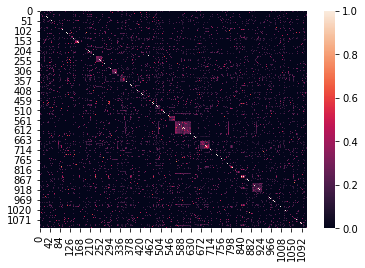

In [21]:
%matplotlib inline
import seaborn as sns
sns.heatmap(defg)

In [ ]:
s = defg.unstack()
so = s.sort_values(kind="quicksort")

print (so[-1157:-1147])

In [22]:
c1 = defg.unstack()
c2 = c1.sort_values(ascending = False)

c3 = c2[(c2 < 0.999) & (c2>0.6)]

In [38]:
c3.head()

190  683    0.912871
683  190    0.912871
560  561    0.894427
561  560    0.894427
289  288    0.866025
dtype: float64

In [28]:
c3.to_frame(name='column_name').to_excel('xlfile.xlsx', sheet_name='s')

In [2]:
print(pll.iloc[100]['Lesson Description'])
print(pll.iloc[841]['Lesson Description'])

NameError: name 'pll' is not defined

In [51]:
c4 = pd.DataFrame({'correlation':c3.index, 'list':c3.values})

In [67]:
c4.head()

,list,corr1,corr2
0,0.912871,190,683
1,0.912871,683,190
2,0.894427,560,561
3,0.894427,561,560
4,0.866025,289,288


In [53]:
index0 = c4['correlation']

parentheses = ['(',')',' ']

index1 = []
index2 = []

for index in index0:
    for punc in parentheses:
        index = str(index)
        index = index.replace(punc,'')
    corrs = index.split(',')
    index1.append(corrs[0])
    index2.append(corrs[1])
    
print(index1[:5])
print(index2[:5])

c4['corr1'] = index1
c4['corr2'] = index2

c4.drop(columns = ['correlation'],inplace=True)


['190', '683', '560', '561', '289']
['683', '190', '561', '560', '288']


In [71]:
c4[['corr1','corr2']] = c4[['corr1','corr2']].astype('int64')
c4.info()
print(c4.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 3 columns):
list     556 non-null float64
corr1    556 non-null int64
corr2    556 non-null int64
dtypes: float64(1), int64(2)
memory usage: 13.1 KB
       list  corr1  corr2
0  0.912871    190    683
1  0.912871    683    190
2  0.894427    560    561
3  0.894427    561    560
4  0.866025    289    288
5  0.866025    597    606
6  0.866025    599    603
7  0.866025    606    597
8  0.866025    288    289
9  0.866025    338    359


In [74]:
c4.groupby(['corr1']).size().sort_values(ascending=False)

corr1
701     10
149      6
147      6
114      5
668      5
113      5
767      5
1074     5
28       5
841      5
100      5
122      5
874      5
1098     5
1049     5
854      4
855      4
103      4
690      4
717      4
267      4
38       4
603      4
259      4
641      3
132      3
472      3
479      3
362      3
352      3
        ..
703      1
700      1
698      1
696      1
693      1
692      1
689      1
685      1
683      1
681      1
672      1
666      1
665      1
661      1
658      1
651      1
648      1
640      1
638      1
630      1
629      1
628      1
619      1
618      1
617      1
604      1
595      1
578      1
574      1
6        1
Length: 333, dtype: int64

In [ ]:
B_sparse = sparse.csr_matrix(counts)
B_sparse

In [ ]:
B_similarities = cosine_similarity(B_sparse)
print('pairwise dense output:\n {}\n'.format(B_similarities))

#also can output sparse matrices
B_similarities_sparse = cosine_similarity(B_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(B_similarities_sparse))

In [ ]:
counts.sum(axis=1)